# Report
The goal of this project is to predict, given an image related to wineyard context, if it presents some kind of distortion.
The camera which is used should take some picture during the day to one particular subject and shows its transformation, in order to see the changements. 
There are some problems related. We noticed that some shots are not good.
The tools that were used in this project are:
- Jupyter Notebook
- Scikit learn's libraries
- Python
- Matplotlib
- Plotly
- OpenCV
- PIL
- Numpy

We checked some tecniques in order to find a good classifier to accomplish our purpose. 

In [2]:
import numpy as np
import os
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from os.path import join
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

## Problem Definition

All of the pictures were taken by 1110 Controller embedded camera and an ArduCam. These camera have the same problems. Our job is to build a classifier which can do Glitch identification and Noise identification, but which is more general as possible. 
During the accomplishment of the process we faced with some troubles.

Our material is based on two image datasets:

- *Photo_Villa*
    
    this dataset is characterized by an unbalanced amount of images which comprehend a majority of black-night and meaningless photos compared to the daytime and usefull photos. The unbalanceness of dataset was problematic becouse the classifier tends to overfit on the majority, and for Machine Learning purposes it is important that the dataset are quite balanced (as Normal distrubution) to avoid overfitting or underfitting. So some operations on dataset was required.
    

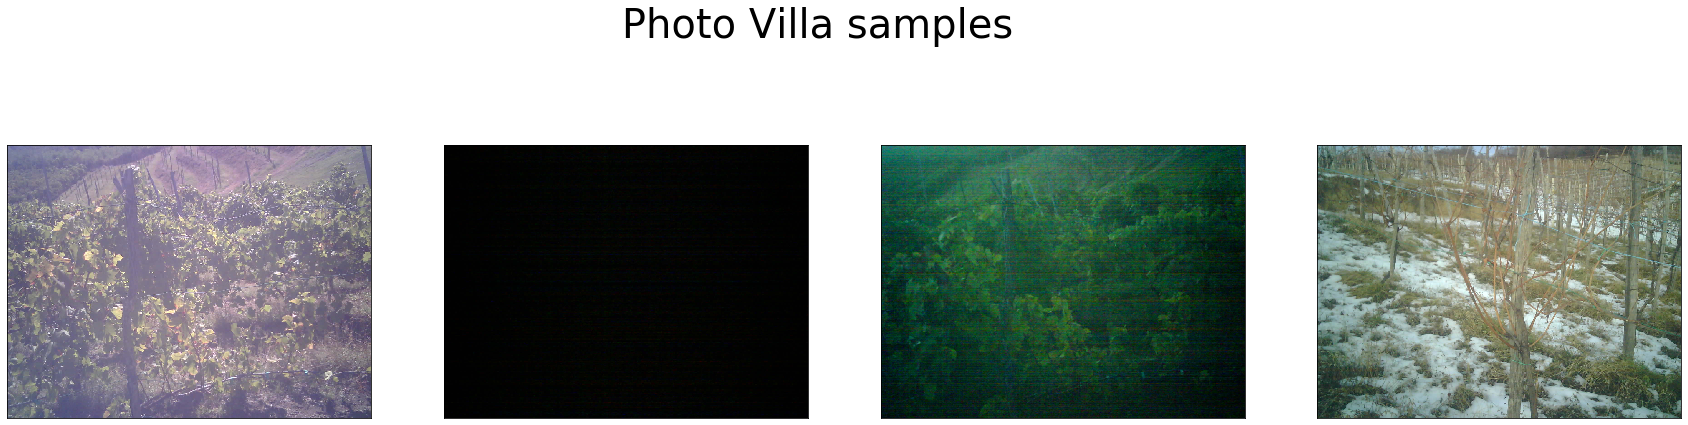

In [22]:
fig, axs = plt.subplots(ncols=4, sharex=True, figsize=(30, 8))
fig.suptitle('Photo Villa samples', fontsize=40)
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].imshow(Image.open("./photo_villa/CAM39_2017_09_12_11_37.jpg"))

axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[1].imshow(Image.open("./photo_villa/CAM39_2017_09_12_20_32.jpg"))

axs[2].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
axs[2].imshow(Image.open("./photo_villa/CAM39_2017_09_19_06_45.jpg"))

axs[3].get_xaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)
axs[3].imshow(Image.open("./photo_villa/CAM39_2017_12_17_07_49.jpg"))

 <hr>
 
 - *Photo_Ufficio*

    the set was composed of random photos taken from various contexts such as office, laboratories, and interns or some externs. In this case there are effectively some glitched photo, but the variance on the subjects makes the classification task deceptive in some ways. With this dataset, we do not perform data augmentation, that is trasformation by adding or changing some images in order to improve classifier's performances, but we work on the original one.

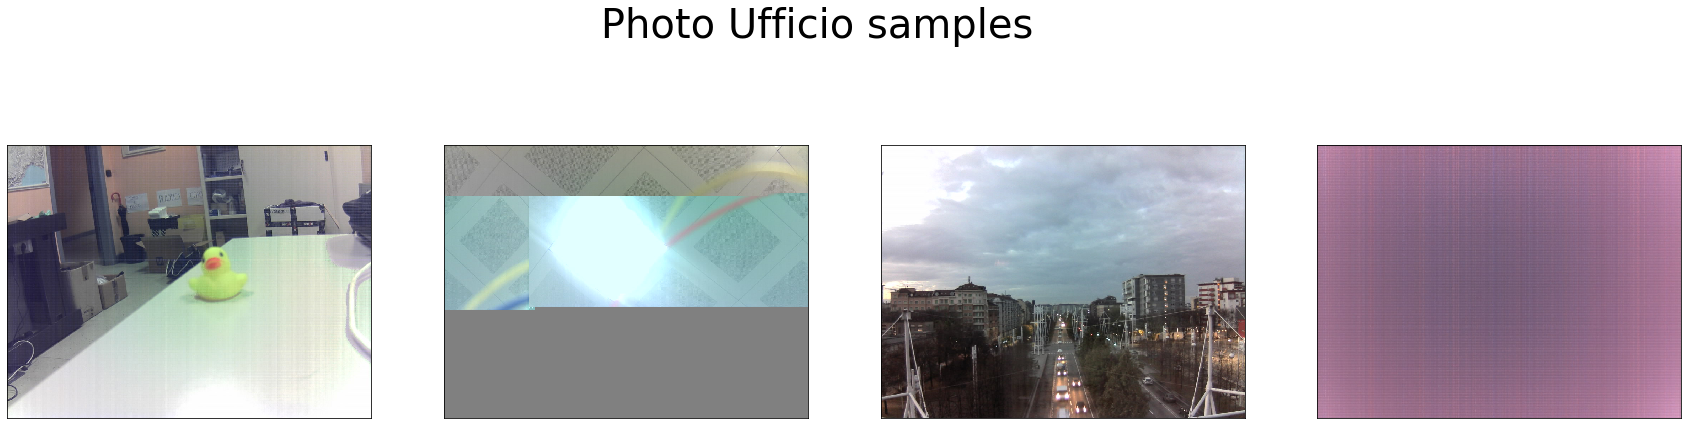

In [30]:
fig, axs = plt.subplots(ncols=4, sharex=True, figsize=(30, 8))
fig.suptitle('Photo Ufficio samples', fontsize=40)
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].imshow(Image.open("./image_dataset_2/1/2018-11-23_11.jpg"))

axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[1].imshow(Image.open("./image_dataset_2/0/2018-11-16_18.jpg"))

axs[2].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
axs[2].imshow(Image.open("./image_dataset_2/1/2018-11-25_07.jpg"))

axs[3].get_xaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)
axs[3].imshow(Image.open("./image_dataset_2/0/2018-11-17_00.jpg"))

## Dataset Refinement


### Photo_Villa

The first dataset requires some operation on data, due to the absence of glitched samples in the image set, and the amount of black images. So we manually remove a certain number of black images to equilibrate the occurencies between nighttime and daytime photo. Then, our job was to make an hand-crafted separation between the two classes, where the class "1" represents the meaningfull images that we want to preserve, and class "0" describes photos without any sense and descartable. There was required to make some choice among the different kinds of photo in our dataset: we choose to consider as 0-class the elements with non-visible or partially visible subjects (such as full-dark photos or foggy photos), and as 1-class the elements that have some interesting information or visible subjects. 

**Data Augmentation**: despite of the second dataset, the first one does not include distorted elements. This is a fundamental request that we have to solve before moving forward, so we decide to add some artificially-made glitched photos via https://snorpey.github.io/jpg-glitch/. This tool generate random glitched samples on uploaded images. In this way, we can obtain different form of glitch on the beginning image pushed from the photo_villa dataset. This help us to generate a balanced and more meaningfull dataset in order to make the classification task feasable and with sense. 
Furthermore, we increase the number of elements of the class "1" by extracting every frames of a timelapse video, downloaded from the IxemLab website. 


### Photo_Ufficio

The second dataset was quite effective, but we decide to remove some dark photo to get a more general result for the classifier. The problems was related to photo loading of the openCV library: it requires to manage the different format types of images. But, despite all, it does not requires to many manipulation to start to work with it.



### Joining Photo_Villa and Photo_Ufficio

Finally we tried to join the two different datasets and to train a classifier on it. It was due to the fact that we want to make the problem as more general as possible, and to try to find some regularities among different natures of images. We just join the datasets and keeping the original labels, so it means that class 0 is made by the joining of the two class-0 groups, and the same for class-1.

